使用影片

In [5]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
import time
import os

'''def get_images_from_video(video_name, time_F):
    video_images = []
    vc = cv2.VideoCapture(video_name)
    c = 1
    
    if vc.isOpened(): 
        rval, video_frame = vc.read()
    else:
        rval = False

    while rval:
        rval, video_frame = vc.read()
        
        if(c % time_F == 0):
            video_images.append(video_frame)     
        c = c + 1
    vc.release()
    
    return video_images

time_F = 5
video_name = 'texture_video.avi' 
video_images = get_images_from_video(video_name, time_F)

for i in range(0, len(video_images)):
    cv2.imwrite( "./img/img"+str(i+1)+".png", video_images[i])'''

def lot_filter(size_filter, g):
    
    end_r = x - size_filter + offset
    end_c = y - size_filter + offset

    co_contrast = np.zeros((x_filter ,y_filter))
    co_homogeneity = np.zeros((x_filter ,y_filter))
    co_correlation = np.zeros((x_filter ,y_filter))

    for i in range(0, end_r, offset):
        for j in range(0, end_c, offset):
            f = image[ i : i + size_filter , j : j + size_filter ]
            result = graycomatrix( f, [1],[0] )
            co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
            co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
            co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))

    for i in range(0, x_filter):
        for j in range(0, y_filter):
            has_print = 0

            match size_filter:
                case 15:
                    for k in range(0, 6):
                        if(has_print):
                            break

                        for l in range(0, 6):
                            if(g[i+k, j+l] == 0):
                                has_print = 1
                                break

                    if(not has_print):
                        if co_correlation[i,j] < 0.22:
                            if co_contrast[i,j] > 10:  
                                if co_homogeneity[i,j] < 0.28:
                                    cv2.circle(g,( j*offset+6 , i*offset+6 ),10 ,0,-1)

                case 23:
                    for k in range(0, 10):
                        if(has_print):
                            break

                        for l in range(0, 10):
                            if(g[i+k, j+l] == 0):
                                has_print = 1
                                break

                    if(not has_print):
                        if co_correlation[i,j] > 0.8079:
                            if co_contrast[i,j] > 35:
                                if co_homogeneity[i,j] < 0.45:
                                    cv2.circle(g,( j*offset+8 , i*offset+8 ),19 ,0,-1)
                                
                case 33:
                    for k in range(0, 5):
                        if(has_print):
                            break

                        for l in range(0, 5):
                            if(g[i+k, j+l] == 0):
                                has_print = 1
                                break

                    if(not has_print):
                        if co_correlation[i,j] > 0.89:
                            cv2.circle(g,( j*offset+6 , i*offset+6 ),10 ,0,-1)

                case 17:
                    if co_correlation[i,j] > 0.744:
                        if co_contrast[i,j] > 20:
                            if co_homogeneity[i,j] < 0.4:
                                cv2.rectangle(g,( j*offset-5 , i*offset-5 ),( j*offset+10 , i*offset+10 ) ,0,-1)

                case 22:
                    if co_correlation[i,j] > 0.72:
                        if co_contrast[i,j] > 25:
                            if co_homogeneity[i,j] < 0.3:
                                cv2.rectangle(g,( j*offset-5 , i*offset-5 ),( j*offset+10 , i*offset+10 ) ,0,-1)

    return g

start = time.time()

for i in range(1087):
    #photo1-1087
    num = i+1
    image = cv2.imread('./img/img'+str(num)+'.png')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    x, y = image.shape[:2]

    new_img = image.copy()

    offset = 5
    x_filter = int((x)/offset)
    y_filter = int((y)/offset)

    new_img = lot_filter(15, new_img)
    new_img = lot_filter(23, new_img)
    new_img = lot_filter(33, new_img)
    new_img = lot_filter(17, new_img)
    new_img = lot_filter(22, new_img)

    
    for i in range(x):
        for j in range(y):
            if(new_img[i,j] > 0):
                new_img[i,j] = 255
    
    end = time.time()
    print("time: %f seconds" % (end-start))
    #plt.imshow(new_img, camp='gray')
    #plt.show()

    cv2.imwrite( "./result/result"+str(num)+".png", new_img)

path = "./result/"
filelist = os.listdir(path)
fps = 2 
size = (800, 600) 

video = cv2.VideoWriter("VideoTest1.avi", 
        cv2.VideoWriter_fourcc('I', '4', '2', '0'), fps, size)

for item in filelist:
    if item.endswith('.png'): 

        item = path + item
        img = cv2.imread(item)
        video.write(img)

video.release()
cv2.destroyAllWindows()


time: 151.485430 seconds
time: 313.962359 seconds
time: 461.126966 seconds
time: 592.925426 seconds
time: 731.424960 seconds
time: 863.349501 seconds
time: 989.393965 seconds


KeyboardInterrupt: 

沒使用影片

15


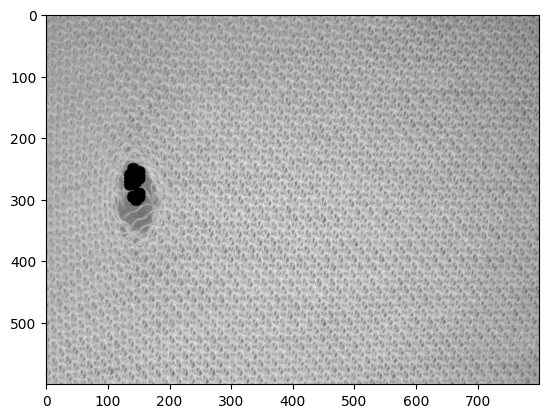

23


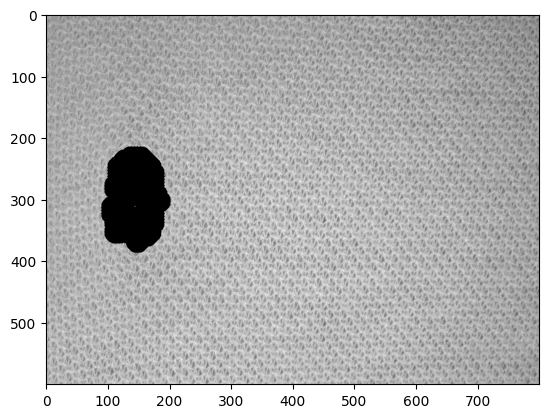

33


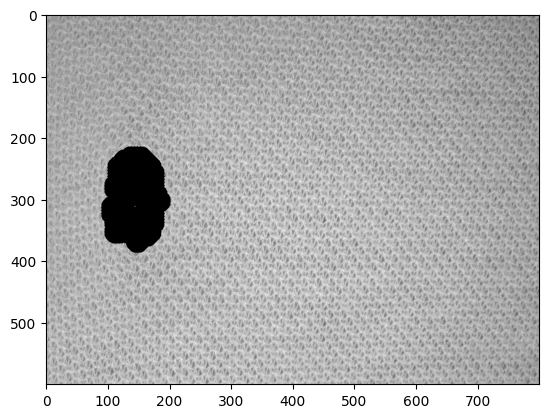

17


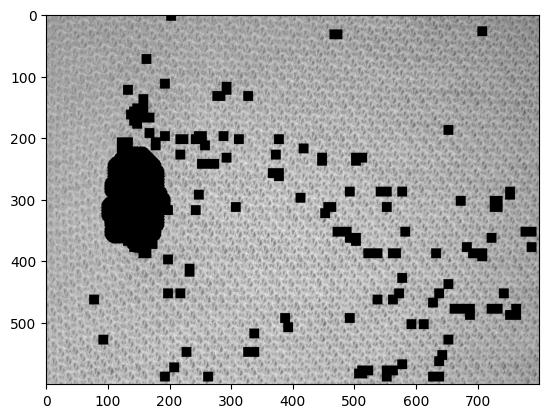

22


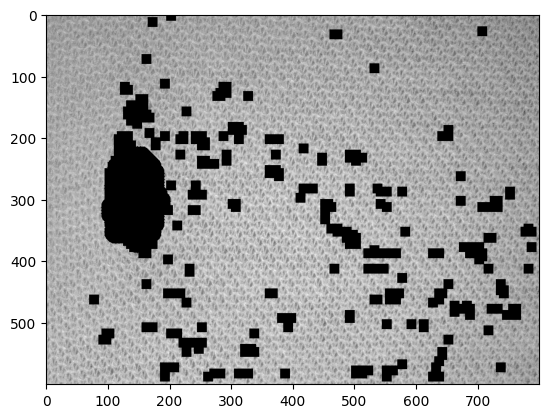

final


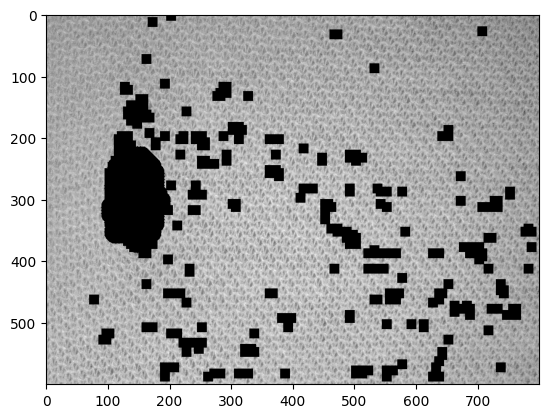

True

In [2]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
import time

image = cv2.imread('./img/img154.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#size_filter = 15
x, y = image.shape[:2]
#print(x,y)

new_img = image.copy()

offset = 5
x_filter = int((x)/offset)
y_filter = int((y)/offset)

def lot_filter(size_filter, g):
    print(size_filter)
    
    end_r = x - size_filter + offset
    end_c = y - size_filter + offset

    co_contrast = np.zeros((x_filter ,y_filter))
    co_homogeneity = np.zeros((x_filter ,y_filter))
    co_correlation = np.zeros((x_filter ,y_filter))

    for i in range(0, end_r, offset):
        for j in range(0, end_c, offset):
            f = image[ i : i + size_filter , j : j + size_filter ]
            result = graycomatrix( f, [1],[0] )
            co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
            co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
            co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))

    for i in range(0, x_filter):
        for j in range(0, y_filter):
            has_print = 0

            match size_filter:
                case 15:
                    for k in range(0, 6):
                        if(has_print):
                            break

                        for l in range(0, 6):
                            if(g[i+k, j+l] == 0):
                                has_print = 1
                                break

                    if(not has_print):
                        if co_correlation[i,j] < 0.22:
                            if co_contrast[i,j] > 10:  
                                if co_homogeneity[i,j] < 0.28:
                                    cv2.circle(g,( j*offset+6 , i*offset+6 ),10 ,0,-1)

                case 23:
                    for k in range(0, 10):
                        if(has_print):
                            break

                        for l in range(0, 10):
                            if(g[i+k, j+l] == 0):
                                has_print = 1
                                break

                    if(not has_print):
                        if co_correlation[i,j] > 0.8079:
                            if co_contrast[i,j] > 35:
                                if co_homogeneity[i,j] < 0.45:
                                    cv2.circle(g,( j*offset+8 , i*offset+8 ),19 ,0,-1)
                                
                case 33:
                    for k in range(0, 5):
                        if(has_print):
                            break

                        for l in range(0, 5):
                            if(g[i+k, j+l] == 0):
                                has_print = 1
                                break

                    if(not has_print):
                        if co_correlation[i,j] > 0.89:
                            cv2.circle(g,( j*offset+6 , i*offset+6 ),10 ,0,-1)

                case 17:
                    if co_correlation[i,j] > 0.744:
                        if co_contrast[i,j] > 20:
                            if co_homogeneity[i,j] < 0.4:
                                cv2.rectangle(g,( j*offset-5 , i*offset-5 ),( j*offset+10 , i*offset+10 ) ,0,-1)

                case 22:
                    if co_correlation[i,j] > 0.72:
                        if co_contrast[i,j] > 25:
                            if co_homogeneity[i,j] < 0.3:
                                cv2.rectangle(g,( j*offset-5 , i*offset-5 ),( j*offset+10 , i*offset+10 ) ,0,-1)

    plt.imshow(g, cmap='gray')
    plt.show()

    return g

new_img = lot_filter(15, new_img)
new_img = lot_filter(23, new_img)
new_img = lot_filter(33, new_img)
new_img = lot_filter(17, new_img)
new_img = lot_filter(22, new_img)

for i in range(x):
    for j in range(y):
        if(new_img[i,j] > 0):
            new_img[i,j] = 255

print("final")
plt.imshow(new_img, cmap='gray')
plt.show()
cv2.imwrite("./result.png", image)
